In [20]:
# importing the Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

Step 2 : Loading the dataset

In [3]:
# loading datasets
digits = load_digits()
X= digits.data
y= digits.target

Step 3 : Spliting the dataset into training and testing data


In [4]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

Step 4 : Standardize the Feature

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 5: Defining the function to evalute the model

In [6]:
#defining the function to evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, technique_name):
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{technique_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

In [7]:
# original data
print("Original Data")
evaluate_model(X_train,X_test,y_train,y_test,"Original Data")

Original Data
Original Data Accuracy: 0.9704
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.94      0.96        50
           2       0.94      1.00      0.97        47
           3       1.00      0.93      0.96        54
           4       1.00      0.98      0.99        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.89      0.98      0.93        43
           9       0.95      0.97      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [8]:
# PCA
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("\nPCA:")
evaluate_model(X_train_pca, X_test_pca, y_train, y_test, "PCA")


PCA:
PCA Accuracy: 0.9648
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      0.92      0.94        50
           2       0.96      0.98      0.97        47
           3       1.00      0.94      0.97        54
           4       0.97      1.00      0.98        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.85      0.95      0.90        43
           9       0.97      0.95      0.96        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.97       540



In [9]:
#lda
lda= LDA(n_components=9)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
print("\nLDA:")
evaluate_model(X_train_lda, X_test_lda, y_train, y_test, "LDA")


LDA:
LDA Accuracy: 0.9481
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.92      0.92      0.92        50
           2       0.92      0.98      0.95        47
           3       0.96      0.94      0.95        54
           4       0.97      0.95      0.96        60
           5       0.95      0.94      0.95        66
           6       0.96      0.98      0.97        53
           7       0.98      0.98      0.98        55
           8       0.87      0.91      0.89        43
           9       0.96      0.90      0.93        59

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



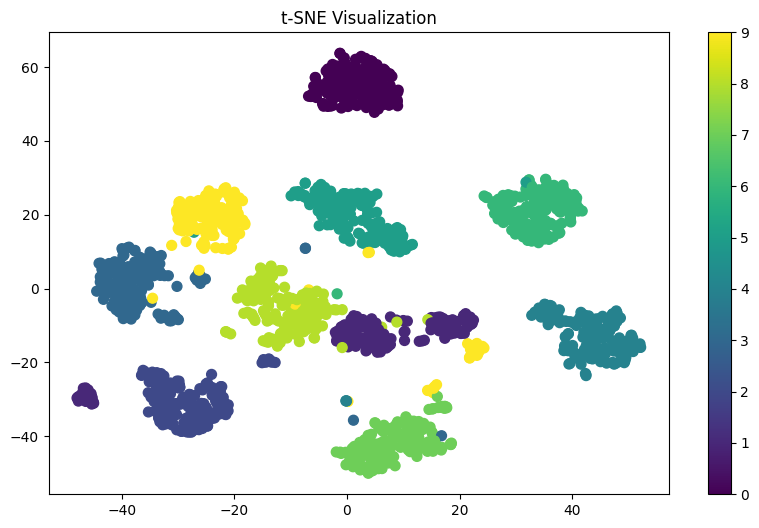

In [10]:
#t-SNE(t-SNE is generally used for visualization but for not training the model)

tsne= TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50)
plt.colorbar()
plt.title("t-SNE Visualization")
plt.show()

In [14]:
#ICA
ica= FastICA( random_state=42)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)
print("\nICA:")
evaluate_model(X_train_ica, X_test_ica, y_train, y_test, "ICA")

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(



ICA:
ICA Accuracy: 0.9093
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.78      0.86      0.82        50
           2       0.83      0.91      0.87        47
           3       0.89      0.91      0.90        54
           4       0.98      0.92      0.95        60
           5       0.95      0.92      0.94        66
           6       0.96      0.98      0.97        53
           7       0.96      0.95      0.95        55
           8       0.84      0.86      0.85        43
           9       0.92      0.83      0.88        59

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.91      0.91      0.91       540



In [16]:
# Recursive Feature Elimination (RFE)
rfe = RFE(LogisticRegression(max_iter=10000), n_features_to_select=30)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
print("\nRFE:")
evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test, "RFE")


RFE:
RFE Accuracy: 0.9593
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.92      0.88      0.90        50
           2       0.96      1.00      0.98        47
           3       0.98      0.94      0.96        54
           4       0.97      0.98      0.98        60
           5       0.97      0.94      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.85      0.93      0.89        43
           9       0.97      0.95      0.96        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

